# 機器學習概論-Final Project: 由番茄外觀預測甜度


---
Members & 分工情況:

吳灃晉 資工 0716116 (20%: 蒐集番茄的各特徵值 & Data Preprocessing & Linear Regression)

席秉萱 資工 0716001 (20%: 蒐集番茄的各特徵值 & Data Visualization & KNN)

林晉德 選讀 609001001 (20%: 蒐集番茄的各特徵值 & Gaussian & 統整、報告)

蔡佳恩 選讀 609001063 (20%: 蒐集番茄的各特徵值 & Logistic Regression & 統整、報告)

李佳豫 生科 0617009 (20%: 蒐集番茄的顏色值 & Random Forest & 統整、報告)

---

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import seaborn as sns
import sklearn.preprocessing as preprocess
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import math as m
import sklearn as skl
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

%matplotlib inline

## Part 1 : Data Import

---
1. 將資料load 進來，存成Data Frame

2. 把pandas的設定打開，可以跑出所有的行列(For Data Visualization )

---

In [8]:
df = pd.read_csv('ML.csv')  
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

dfremovenum=df.iloc[:,1:]
dfremovenum

,pedicle,black_spot,green_or_yellow,tip,folds,weight,length,width,white,moisture,oil,elasticity,refraction,r,g,b,sweetness
0,0,1.0,1,1,1,16.6,3.8,2.8,3.0,21.0,57.0,41.0,1.3417,99,40,24,6.0
1,0,0.0,0,0,1,7.6,2.5,2.3,3.0,20.0,57.0,41.0,1.3417,104,45,29,6.0
2,0,0.0,1,0,0,6.5,2.1,1.9,5.0,21.0,57.0,41.0,1.3373,131,46,17,3.0
3,1,0.0,1,0,0,11.3,3.1,2.6,3.0,20.0,57.0,41.0,1.3364,118,38,15,2.5
4,1,1.0,0,0,0,9.2,2.7,2.1,5.0,20.0,57.0,41.0,1.3380,102,31,13,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1,1.0,0,1,1,9.0,3.1,2.1,6.0,20.0,57.0,34.0,1.3395,112,52,28,4.5
464,0,1.0,0,1,0,9.7,3.1,2.1,5.0,20.0,57.0,40.0,1.3410,107,41,19,5.5
465,0,1.0,1,1,1,7.3,2.9,1.8,5.0,23.0,55.0,42.0,1.3417,102,37,19,6.0
466,0,0.0,1,1,0,8.1,2.9,2.1,6.0,20.0,57.0,40.0,1.3395,97,26,8,4.5


In [9]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean', verbose=0, copy=True)
dfmissing=imp.fit_transform(dfremovenum)
#print(dfmissing)
x = dfmissing[:, :-1]
y = dfmissing[:,-1]

In [10]:
xscaled = preprocess.scale(x)
xscaled

array([[-0.93782625,  0.97776156,  1.04816731, ..., -0.99802202,
        -0.28007634,  0.17594907],
       [-0.93782625, -1.02493427, -0.95404616, ..., -0.46628898,
         0.26607252,  0.92182014],
       [-0.93782625, -1.02493427,  1.04816731, ...,  2.40506947,
         0.37530229, -0.86827043],
       ...,
       [-0.93782625,  0.97776156,  1.04816731, ..., -0.6789822 ,
        -0.60776565, -0.569922  ],
       [-0.93782625, -1.02493427,  1.04816731, ..., -1.21071524,
        -1.80929314, -2.21083836],
       [ 1.0662956 ,  0.97776156, -0.95404616, ..., -0.46628898,
        -1.04468474, -1.76331571]])

In [11]:
unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

[2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.  9.5] [ 4  4 17 50 77 92 81 65 32 21 12  6  4  2  1]


酸度0 小於等於4<br>
酸度1 4.5-5.0<br>
酸度2 5.5-6.0<br>
酸度3 6.5-7.0<br>
酸度4 大於等於7.5<br>

In [12]:
yflevel=np.array([], dtype=int)
for i in y:
    if i <= 4.2:
        yflevel = np.append(yflevel, 0)
    elif i<=5.2:
        yflevel = np.append(yflevel, 1)
    elif i<=6.2:
        yflevel = np.append(yflevel, 2)
    elif i<=7.2:
        yflevel = np.append(yflevel, 3)
    else:
        yflevel = np.append(yflevel, 4)
#print(yflevel)

## Part 2 : Show Data Distribution with Data Visualization

---
1. 先繪出每個feature的數值分布

2. 再依照甜度等級，繪出每個feature的數值分布

---
### 每個feature中的數值分布:

D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


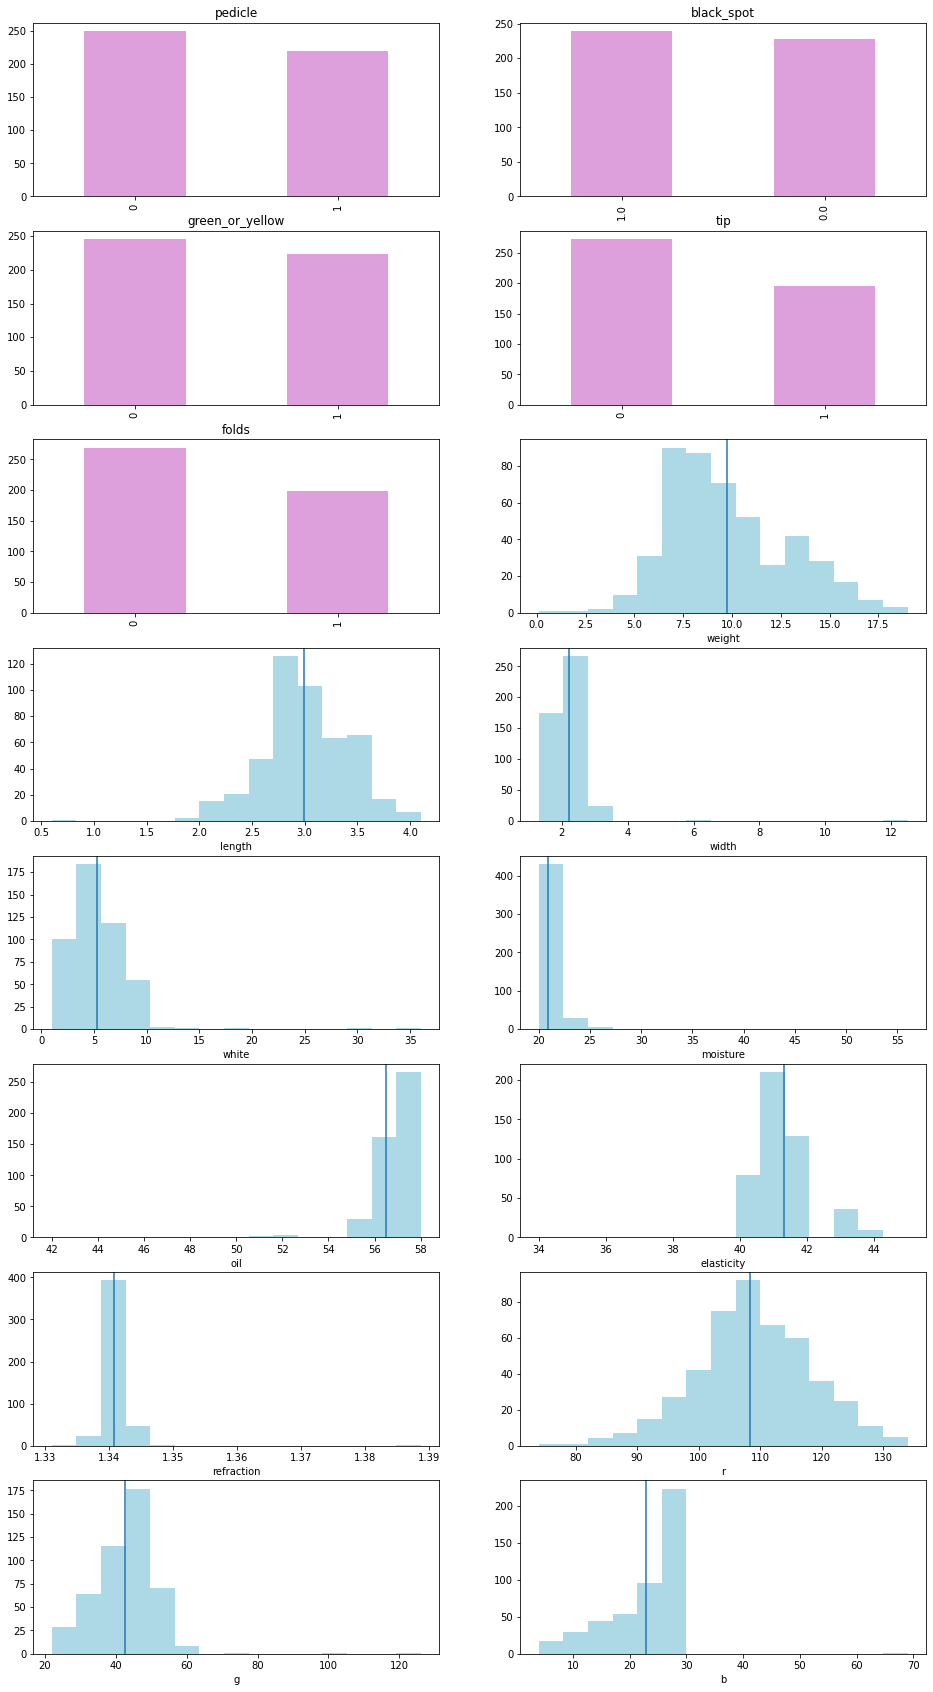

In [13]:
plt.figure(figsize=(16,30))
plt.subplot(8,2,1)
dfremovenum['pedicle'].value_counts().plot.bar(color='plum', title="pedicle")
plt.subplot(8,2,2)
dfremovenum['black_spot'].value_counts().plot.bar(color='plum', title="black_spot")
plt.subplot(8,2,3)
dfremovenum['green_or_yellow'].value_counts().plot.bar(color='plum', title="green_or_yellow")
plt.subplot(8,2,4)
dfremovenum['tip'].value_counts().plot.bar(color='plum', title="tip")
plt.subplot(8,2,5)
dfremovenum['folds'].value_counts().plot.bar(color='plum', title="folds")

plt.subplot(8,2,6)
plt.hist(dfremovenum['weight'], bins=15, color='lightblue')
plt.xlabel('weight')
plt.axvline(x=dfremovenum['weight'].mean())

plt.subplot(8,2,7)
plt.hist(dfremovenum['length'], bins=15, color='lightblue')
plt.xlabel('length')
plt.axvline(x=dfremovenum['length'].mean())

plt.subplot(8,2,8) 
plt.hist(dfremovenum['width'], bins=15, color='lightblue')
plt.xlabel('width')
plt.axvline(x=dfremovenum['width'].mean())

plt.subplot(8,2,9) 
plt.hist(dfremovenum['white'], bins=15, color='lightblue')
plt.xlabel('white')
plt.axvline(x=dfremovenum['white'].mean())

plt.subplot(8,2,10) 
plt.hist(dfremovenum['moisture'], bins=15, color='lightblue')
plt.xlabel('moisture')
plt.axvline(x=dfremovenum['moisture'].mean())

plt.subplot(8,2,11) 
plt.hist(dfremovenum['oil'], bins=15, color='lightblue')
plt.xlabel('oil')
plt.axvline(x=dfremovenum['oil'].mean())

plt.subplot(8,2,12) 
plt.hist(dfremovenum['elasticity'], bins=15, color='lightblue')
plt.xlabel('elasticity')
plt.axvline(x=dfremovenum['elasticity'].mean())

plt.subplot(8,2,13) 
plt.hist(dfremovenum['refraction'], bins=15, color='lightblue')
plt.xlabel('refraction')
plt.axvline(x=dfremovenum['refraction'].mean())

plt.subplot(8,2,14) 
plt.hist(dfremovenum['r'], bins=15, color='lightblue')
plt.xlabel('r')
plt.axvline(x=dfremovenum['r'].mean())

plt.subplot(8,2,15) 
plt.hist(dfremovenum['g'], bins=15, color='lightblue')
plt.xlabel('g')
plt.axvline(x=dfremovenum['g'].mean())

plt.subplot(8,2,16) 
plt.hist(dfremovenum['b'], bins=15, color='lightblue')
plt.xlabel('b')
plt.axvline(x=dfremovenum['b'].mean())

#### 依據不同的甜度等級來看數值分布:
##### 先把dataframe改成方便繪圖的樣子

In [14]:
df = dfremovenum.drop(['sweetness'], axis=1)
df['sweetness']=yflevel

##### 作圖:先畫類型是非數值的feature

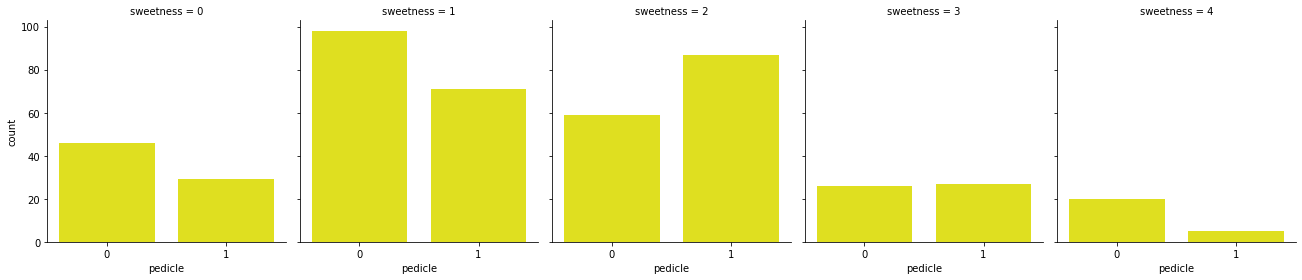

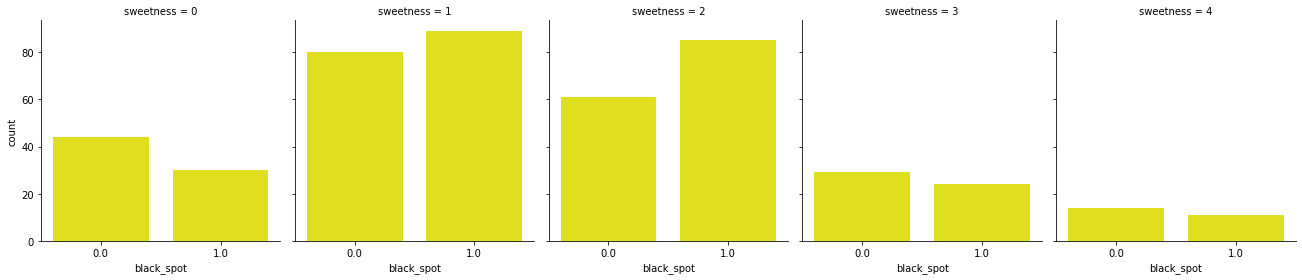

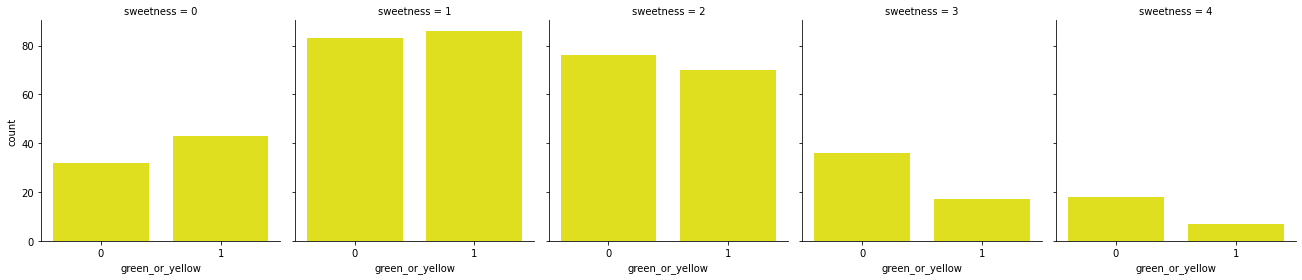

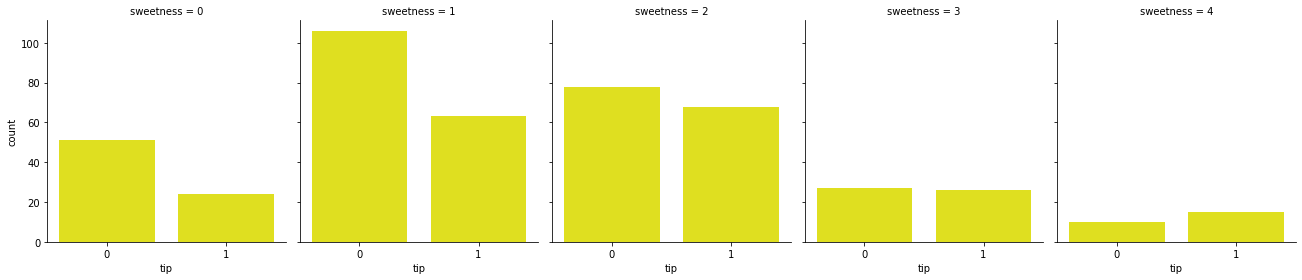

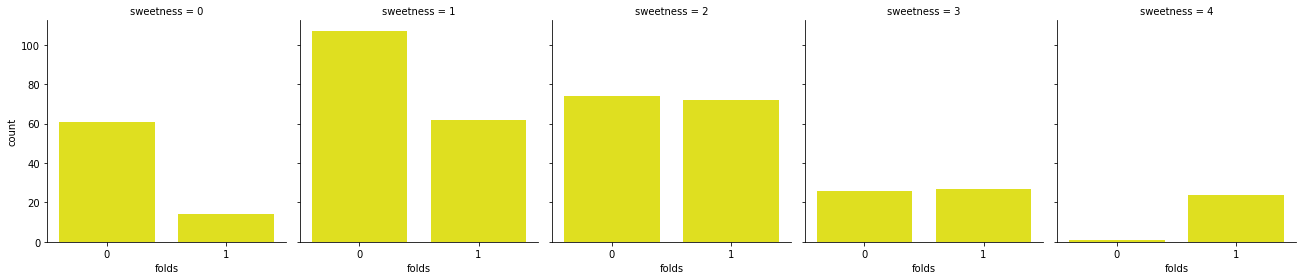

In [15]:
sns.catplot(x='pedicle', data=df, col='sweetness', kind='count', color='yellow', height=4, aspect=.9)
sns.catplot(x='black_spot', data=df, col='sweetness', kind='count', color='yellow', height=4, aspect=.9)
sns.catplot(x='green_or_yellow', data=df, col='sweetness', kind='count', color='yellow', height=4, aspect=.9)
sns.catplot(x='tip', data=df, col='sweetness', kind='count', color='yellow', height=4, aspect=.9)
sns.catplot(x='folds', data=df, col='sweetness', kind='count', color='yellow', height=4, aspect=.9)

##### 作圖:再畫類型是數值型的feature

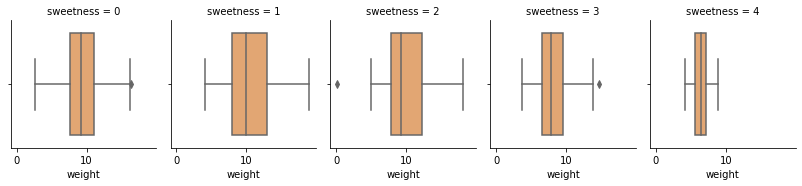

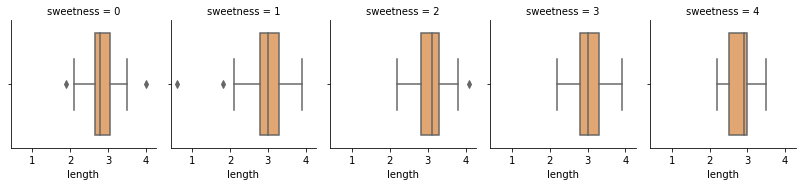

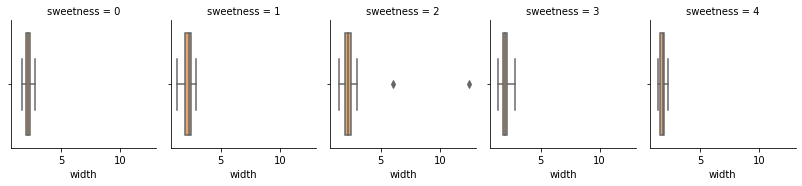

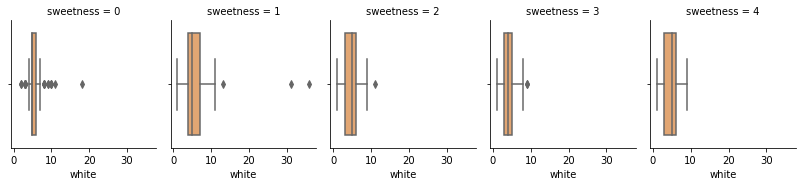

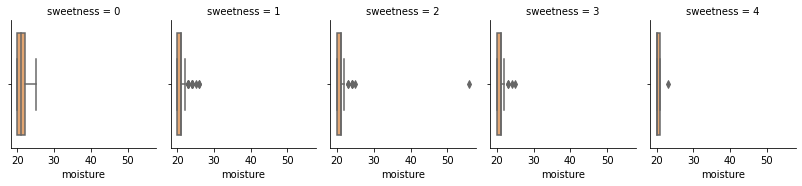

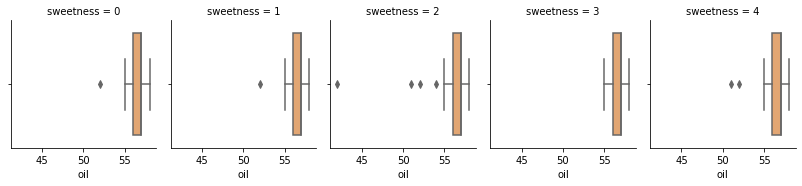

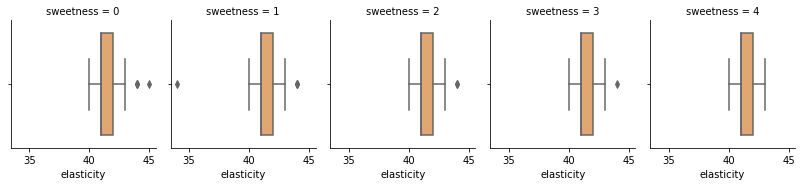

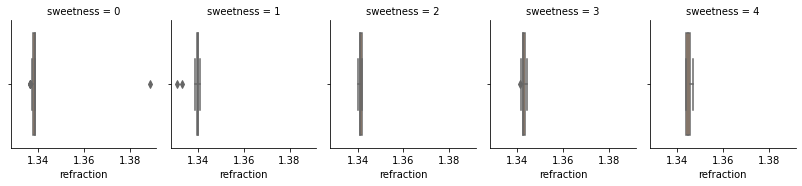

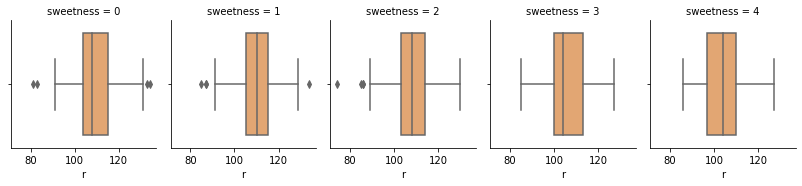

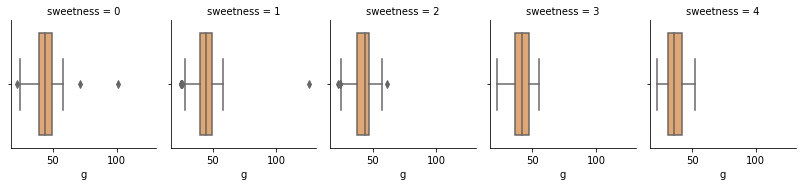

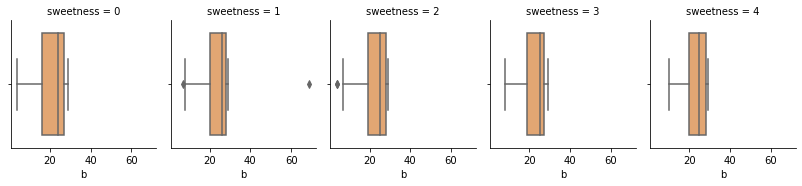

In [10]:
sns.catplot(x='weight', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='length', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='width', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='white', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='moisture', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='oil', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='elasticity', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='refraction', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='r', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='g', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)
sns.catplot(x='b', data=df, col='sweetness', kind='box', color='sandybrown', height=2.5, aspect=.9)

## Part 3 : Building Models
### 分別實作以下五種模型，並各自比較結果
---
1. KNN
2. Linear Regression
3. Guassian
4. Random Forest
5. Logistic Regression
---

### 1. KNN:

#### Validation: 用Hold-out validation, ratio = 7:3
#### 試驗neighbors=5, 7, 9的不同情況

In [12]:
x_train, x_test, y_train, y_test = train_test_split(xscaled, yflevel, train_size=0.7)

# set neighbors=5
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
predict_knn = clf.predict(x_test)
accuracy_knn5 = accuracy_score(y_test, predict_knn)
precision_knn5 = precision_score(y_test, predict_knn, average='weighted')
recall_knn5 = recall_score(y_test, predict_knn, average='weighted')
error_knn5 = mean_absolute_error(y_test, predict_knn)
matrix_knn5 = confusion_matrix(y_test, predict_knn)

# set neighbors=7
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train, y_train)
predict_knn = clf.predict(x_test)
accuracy_knn7 = accuracy_score(y_test, predict_knn)
precision_knn7 = precision_score(y_test, predict_knn, average='weighted')
recall_knn7 = recall_score(y_test, predict_knn, average='weighted')
error_knn7 = mean_absolute_error(y_test, predict_knn)
matrix_knn7 = confusion_matrix(y_test, predict_knn)

# set neighbors=9
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train, y_train)
predict_knn = clf.predict(x_test)
accuracy_knn9 = accuracy_score(y_test, predict_knn)
precision_knn9 = precision_score(y_test, predict_knn, average='weighted')
recall_knn9 = recall_score(y_test, predict_knn, average='weighted')
error_knn9 = mean_absolute_error(y_test, predict_knn)
matrix_knn9 = confusion_matrix(y_test, predict_knn)

#### Result:
#### 列出三種K值時的accuracy, recall, precision, mean absolute error, confusion matrix

In [13]:
print("Result for KNN:")
table_knn = pd.DataFrame(columns=['accuracy', 'recall', 'precision', 'mean_absolute_error'], index=['K=5', 'K=7', 'K=9'])
table_knn['accuracy']['K=5'] = accuracy_knn5
table_knn['recall']['K=5'] = recall_knn5
table_knn['precision']['K=5'] = precision_knn5
table_knn['mean_absolute_error']['K=5'] = error_knn5
table_knn['accuracy']['K=7'] = accuracy_knn7
table_knn['recall']['K=7'] = recall_knn7
table_knn['precision']['K=7'] = precision_knn7
table_knn['mean_absolute_error']['K=7'] = error_knn7
table_knn['accuracy']['K=9'] = accuracy_knn9
table_knn['recall']['K=9'] = recall_knn9
table_knn['precision']['K=9'] = precision_knn9
table_knn['mean_absolute_error']['K=9'] = error_knn9
print(table_knn)

print("\nConfusion Matrix with K=5:")
print(matrix_knn5)
print("\nConfusion Matrix with K=7:")
print(matrix_knn7)
print("\nConfusion Matrix with K=9:")
print(matrix_knn9)

Result for KNN:
     accuracy    recall precision mean_absolute_error
K=5  0.375887  0.375887  0.370288            0.808511
K=7  0.382979  0.382979  0.374057            0.815603
K=9  0.397163  0.397163  0.384026            0.794326

Confusion Matrix with K=5:
[[ 4 18  5  1  1]
 [11 26 12  1  0]
 [ 1 20 18  1  0]
 [ 1  5  3  3  1]
 [ 0  1  5  1  2]]

Confusion Matrix with K=7:
[[ 4 18  5  1  1]
 [ 5 30 14  1  0]
 [ 1 20 16  3  0]
 [ 1  7  1  2  2]
 [ 0  1  5  1  2]]

Confusion Matrix with K=9:
[[ 4 17  6  1  1]
 [ 6 30 13  1  0]
 [ 1 21 18  0  0]
 [ 1  7  3  1  1]
 [ 0  1  3  2  3]]


### 2. Linear Regression

#### 去計算每個變數中間的彼此依存度 ，可以發現就我們的數據基本上只有rg的正向關係比較大，其餘的資料彼此的依存度都很低

,pedicle,black_spot,green_or_yellow,tip,folds,weight,length,width,white,moisture,oil,elasticity,refraction,r,g,b,sweetness
pedicle,1.000000,0.072319,0.117015,-0.006232,-0.001055,0.180742,0.039924,0.054260,-0.005026,0.011374,0.018280,-0.041159,0.049830,0.054999,0.088154,0.062800,0.036269
black_spot,0.072319,1.000000,0.020438,0.005999,0.261030,0.078386,0.011793,0.070876,-0.049712,-0.036620,0.057739,-0.015558,0.064120,-0.071693,-0.048402,-0.067316,0.043705
green_or_yellow,0.117015,0.020438,1.000000,-0.003409,-0.076350,0.217594,0.165007,0.134835,0.050058,0.099195,-0.097578,0.078018,-0.064274,0.105659,0.020190,-0.053593,-0.179793
tip,-0.006232,0.005999,-0.003409,1.000000,0.093371,-0.284115,0.242485,-0.249982,-0.068419,-0.057848,-0.080855,-0.128775,0.126478,-0.191321,-0.050886,-0.013452,0.170133
folds,-0.001055,0.261030,-0.076350,0.093371,1.000000,-0.038065,0.126484,-0.092489,-0.086953,-0.099389,-0.007229,-0.093078,0.160205,-0.088039,-0.035057,0.044951,0.319796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
refraction,0.049830,0.064120,-0.064274,0.126478,0.160205,-0.141862,0.022564,-0.088084,-0.071473,-0.064924,0.005650,-0.052904,1.000000,-0.081106,-0.066993,0.039886,0.547929
r,0.054999,-0.071693,0.105659,-0.191321,-0.088039,0.201309,0.058729,0.112765,0.068170,0.118152,-0.025595,0.089948,-0.081106,1.000000,0.579085,0.408648,-0.175358
g,0.088154,-0.048402,0.020190,-0.050886,-0.035057,0.028830,-0.121657,0.039273,0.369811,0.032272,0.029924,0.047232,-0.066993,0.579085,1.000000,0.798537,-0.170099
b,0.062800,-0.067316,-0.053593,-0.013452,0.044951,-0.008570,-0.096481,0.013114,0.237250,-0.052926,0.059894,0.015178,0.039886,0.408648,0.798537,1.000000,0.052935


<AxesSubplot:>

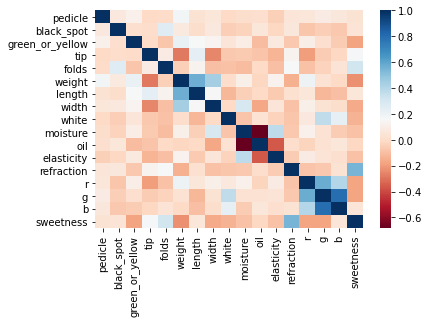

In [15]:
pdmissing=pd.DataFrame(dfmissing)
pdmissing.columns=dfremovenum.columns
pdmissing.index=dfremovenum.index
corr2 = pdmissing.corr()
display(corr2)
sns.heatmap(corr2,xticklabels=corr2.columns, yticklabels=corr2.columns ,cmap='RdBu')

#### 使用 holdout 去切割測試資料

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, yflevel, test_size=0.3, random_state=1)

#### 使用四個不同的 k 值去使用 PolynomialFeatures 帶入 linear Regression Model <br> 以 k=1當作範例 分別輸出計算出來的常數項 以及每個變數前面的係數

In [17]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
#intercept = regression_model.intercept_
print('model const:')
print(regression_model.intercept_)
#coefficent = regression_model.coef_[0][0]
print('model coefficient:')
print(regression_model.coef_)
#print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)
regression_model.score(X_train, y_train)
trans = PolynomialFeatures(degree=1)
xtrans1 = trans.fit_transform(X_train)
xtest1 = trans.fit_transform(X_test)
#print(xtrans1)
trans = PolynomialFeatures(degree=2)
xtrans2 = trans.fit_transform(X_train)
xtest2 = trans.fit_transform(X_test)
#print(xtrans2)
trans = PolynomialFeatures(degree=3)
xtrans3 = trans.fit_transform(X_train)
xtest3 = trans.fit_transform(X_test)
#print(xtrans3)
trans = PolynomialFeatures(degree=4)
xtrans4 = trans.fit_transform(X_train)
xtest4 = trans.fit_transform(X_test)
#print(xtrans4)



model const:
-147.5793625757237
model coefficient:
[ 1.79694363e-01 -1.66605288e-01 -1.56985388e-01 -1.26113832e-01
  3.72399179e-01 -8.19757943e-02  4.31101311e-01 -1.27864866e-02
 -9.72097990e-03 -3.79409754e-02 -4.37751254e-02  3.43278938e-02
  1.13334847e+02 -5.83755062e-03 -4.95746010e-02  5.92754217e-02]
----------------------------------------------------------------------------------------------------


#### 使用四個不同的 k 值去 fit  4種不同的模型，分別去做他們的誤差預測(使用 r squared) ，可以發現其實在 k=2 的狀態之後整個函數的 over fitting 相當嚴重，雖然 accuracy 相當高， 但是 對於霧拺的誤差值其實非常明顯。

In [18]:
reg1 = LinearRegression(fit_intercept=False).fit(xtrans1,y_train)
ypredict1=reg1.predict(xtest1)
yact1=reg1.predict(xtrans1)
para1=reg1.coef_
#print(para1.shape)
reg2 = LinearRegression(fit_intercept=False).fit(xtrans2,y_train)
para2=reg2.coef_
#print(para2)
ypredict2=reg2.predict(xtest2)
yact2=reg2.predict(xtrans2)

reg3 = LinearRegression(fit_intercept=False).fit(xtrans3, y_train)
ypredict3=reg3.predict(xtest3)
yact3=reg3.predict(xtrans3)

para3=reg3.coef_
reg4 = LinearRegression(fit_intercept=False).fit(xtrans4, y_train)
ypredict4=reg4.predict(xtest4)
yact4=reg4.predict(xtrans4)

para4=reg4.coef_
print('Multiple Linear Regression')
print('bias')
print('degree1',reg1.score(xtrans1, y_train))
print('degree2',reg2.score(xtrans2, y_train))
print('degree3',reg3.score(xtrans3, y_train))
print('degree4',reg4.score(xtrans4, y_train))

from sklearn.metrics import r2_score
#print(ypredict2)
#print(y_test)
print('variance')
print('degree1',r2_score(y_test, ypredict1))
print('degree2',r2_score(y_test, ypredict2))
print('degree3',r2_score(y_test, ypredict3))
print('degree4',r2_score(y_test, ypredict4))


Multiple Linear Regression
bias
degree1 0.39693612175669923
degree2 0.9190819499284127
degree3 1.0
degree4 1.0
variance
degree1 0.36219952987252735
degree2 -6.055918860925899
degree3 -2650.2056835971575
degree4 -155636.18098771136


#### 用圖去顯示 k=1  predict 與 measured 的分佈狀況

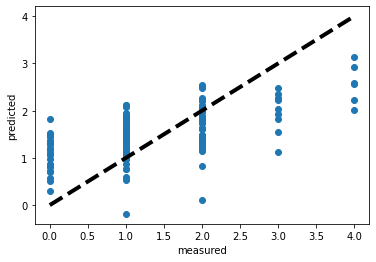

In [19]:
fig, ax = plt.subplots()
ax.scatter(y_test, ypredict1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

#### 用圖去顯示 k=3  predict 與 measured 的分佈狀況 可以發現 有少數極端的例子影響整個數值的分析表現

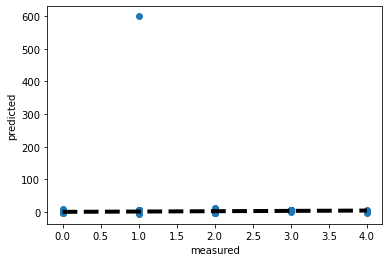

In [20]:
fig, ax = plt.subplots()
ax.scatter(y_test, ypredict3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [21]:
#dfremovenum.fit=preprocess.scale(dfremovenum)
#print(dfremovenum)
econ_df_before = pdmissing
X1 = sm.tools.add_constant(econ_df_before)
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
print('看看每個變數之間的相互關係，避免 multicollinearity')
print('-'*100)
display(series_before)
desc_df = pdmissing.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)
desc_df
pdmissing_remove= pdmissing[(np.abs(stats.zscore(pdmissing)) < 3).all(axis=1)]
print('刪除超過三倍標準差的資料')
print(pdmissing.index.difference(pdmissing_remove.index))
#print(pdmissing_remove)

看看每個變數之間的相互關係，避免 multicollinearity
----------------------------------------------------------------------------------------------------


const              329127.454927
pedicle                 1.098186
black_spot              1.131818
green_or_yellow         1.119757
tip                     1.618275
                       ...      
refraction              1.444407
r                       1.784708
g                       4.541914
b                       3.226922
sweetness               1.853132
Length: 18, dtype: float64

刪除超過三倍標準差的資料
Int64Index([ 40,  52,  53,  82, 110, 134, 153, 155, 168, 173, 194, 199, 253,
            316, 320, 355, 356, 404, 406, 407, 415, 463],
           dtype='int64')


##### 刪除超過三倍標準差的極端資料值，讓整個模型（k=1）的預測更準確 ，可以發現整體預測的準確率提高到9成

In [22]:
valuedealed=pdmissing_remove.to_numpy()
xdeal = valuedealed[:, :-1]
ydeal = valuedealed[:,-1]
ydealf=np.array([], dtype=int)
for i in ydeal:
    if i <= 4.2:
        ydealf = np.append(ydealf, 0)
    elif i<=5.2:
        ydealf = np.append(ydealf, 1)
    elif i<=6.2:
        ydealf = np.append(ydealf, 2)
    elif i<=7.2:
        ydealf = np.append(ydealf, 3)
    else:
        ydealf = np.append(ydealf, 4)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(xdeal, ydealf, test_size=0.3, random_state=1)
regression_model = LinearRegression()
regression_model.fit(Xd_train, yd_train)
print('after drop the extreme value')
print('bias')
print(regression_model.score(Xd_train, yd_train))
yd_pred=regression_model.predict(Xd_test)
print('variance')
print(r2_score(yd_test, yd_pred))

after drop the extreme value
bias
0.874218915078801
variance
0.9030687397100223


#### 用圖去顯示修正過後 k=1  predict 與 measured 的分佈狀況 

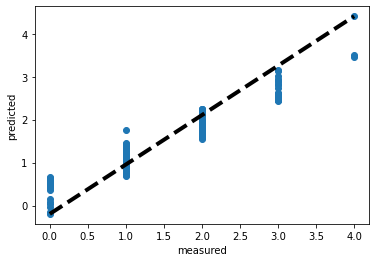

In [23]:
fig, ax = plt.subplots()
ax.scatter(yd_test, yd_pred)
ax.plot([yd_test.min(), yd_test.max()], [yd_pred.min(), yd_pred.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

### 3. Guassian 

In [24]:
def plot_confusion_matrix1(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [25]:
def show_GuassNB_matrix(valid_y, pred):
    print("======================")
    plot_confusion_matrix1(valid_y, pred, classes=np.array(['sweet0', 'sweet1',"sweet2","sweet3","sweet4"]), cmap=plt.cm.Blues)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(xscaled, yflevel, train_size=0.7)
print(x_train.shape)

(327, 16)


#### holdout (7:3)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.83      0.95      0.88        56
           2       0.94      0.78      0.85        40
           3       0.86      0.80      0.83        15
           4       0.73      0.89      0.80         9

    accuracy                           0.86       141
   macro avg       0.85      0.84      0.84       141
weighted avg       0.87      0.86      0.86       141

Confusion matrix
[[17  3  0  0  1]
 [ 2 53  1  0  0]
 [ 0  8 31  1  0]
 [ 0  0  1 12  2]
 [ 0  0  0  1  8]]


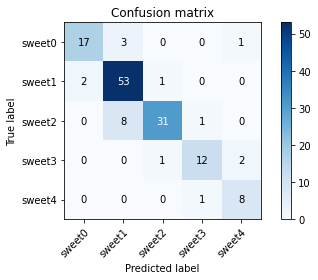

In [28]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred  = clf.predict(x_test)
print(classification_report(y_test, y_pred))
show_GuassNB_matrix(y_test, y_pred)
#print(y_pred)

In [29]:
print(xscaled.shape, yflevel.shape)
#yflevel = yflevel.reshape((468,1))
print(yflevel.shape)
data = np.hstack((xscaled,yflevel.reshape(468,1)))

(468, 16) (468,)
(468,)


In [30]:
def read_data_cross_validation(allData, allData_y, k):
    trainDatas = []
    testDatas = []
    trainDatas_y = []
    testDatas_y = []


    fold_size = int(len(allData)/k)
    mark_list = []
    for i in range(k):
        mark = []
        mark.append(i*fold_size)
        mark.append((i+1)*fold_size)
        mark_list.append(mark)

    print(mark_list)

    for mark in mark_list:
        trainData = np.array(allData[mark[1]:].tolist() + allData[:mark[0]].tolist())
        testData = allData[mark[0]:mark[1]]
        trainData_y = np.array(allData_y[mark[1]:] + allData_y[:mark[0]])
        testData_y = np.array(allData_y[mark[0]:mark[1]])
        trainDatas.append(trainData)
        testDatas.append(testData)
        trainDatas_y.append(trainData_y)
        testDatas_y.append(testData_y)
    print(trainDatas, testDatas, trainDatas_y, testDatas_y)
    return trainDatas, testDatas, trainDatas_y, testDatas_y

In [31]:
x_train, x_test, y_train, y_test = read_data_cross_validation(xscaled,list(yflevel), k=3)

[[0, 156], [156, 312], [312, 468]]
[array([[ 1.0662956 ,  0.97776156,  1.04816731, ...,  0.06544407,
         0.92145115,  0.92182014],
       [-0.93782625,  0.97776156, -0.95404616, ...,  0.59717711,
         0.37530229,  0.62347172],
       [ 1.0662956 ,  0.97776156,  1.04816731, ...,  1.44794999,
         0.26607252,  0.32512329],
       ...,
       [-0.93782625,  0.97776156,  1.04816731, ..., -0.6789822 ,
        -0.60776565, -0.569922  ],
       [-0.93782625, -1.02493427,  1.04816731, ..., -1.21071524,
        -1.80929314, -2.21083836],
       [ 1.0662956 ,  0.97776156, -0.95404616, ..., -0.46628898,
        -1.04468474, -1.76331571]]), array([[-0.93782625,  0.97776156,  1.04816731, ...,  0.80987033,
        -0.49853588, -1.16661886],
       [-0.93782625,  0.97776156, -0.95404616, ..., -0.6789822 ,
         0.81222138,  0.92182014],
       [-0.93782625, -1.02493427,  1.04816731, ..., -1.8487949 ,
        -2.02775268, -2.21083836],
       ...,
       [-0.93782625,  0.97776156,  1.0

#### Kfold (k=3) 

              precision    recall  f1-score   support

           0       0.58      0.39      0.46        75
           1       0.63      0.93      0.75       169
           2       0.88      0.54      0.67       146
           3       0.65      0.64      0.65        53
           4       0.42      0.40      0.41        25

    accuracy                           0.66       468
   macro avg       0.63      0.58      0.59       468
weighted avg       0.69      0.66      0.65       468

Confusion matrix
[[ 29  45   0   0   1]
 [  5 158   5   0   1]
 [  1  48  79  11   7]
 [  7   1   6  34   5]
 [  8   0   0   7  10]]


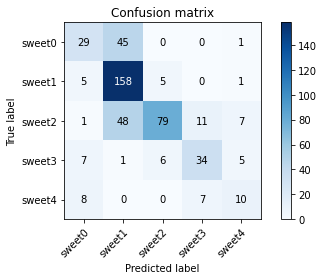

In [32]:
k = 3
y_true = []
y_prediction = []
for i_k in range(k):
    clf = GaussianNB()
    clf.fit(x_train[i_k], y_train[i_k])
    y_pred  = clf.predict(x_test[i_k])
    
    y_true.extend(y_test[i_k])
    y_prediction.extend(y_pred)

print(classification_report(y_true, y_prediction))
show_GuassNB_matrix(y_true, y_prediction)
    

### 4. Random Forest

Binary Dataset:

hold out testing:tree#= 10

-accuracy: 0.91

-report:
        precision      recall         
0       0.95           0.91           
1       0.94           0.96           
2       0.94           0.96           
3       0.8            0.86           
4       0.71           0.56           

-confusion matrix:
[[21  1  0  0  1]
 [ 1 46  1  0  0]
 [ 0  2 45  0  0]
 [ 0  0  1 12  1]
 [ 0  0  1  3  5]]


hold out testing:tree#= 50

-accuracy: 0.9

-report:
        precision      recall         
0       0.94           0.6            
1       0.82           0.95           
2       0.96           1.0            
3       0.89           0.94           
4       1.0            0.86           

-confusion matrix:
[[15  9  0  1  0]
 [ 1 40  1  0  0]
 [ 0  0 50  0  0]
 [ 0  0  1 16  0]
 [ 0  0  0  1  6]]


hold out testing:tree#= 100

-accuracy: 0.92

-report:
        precision      recall         
0       0.95           0.95           
1       0.97           0.95           
2       0.

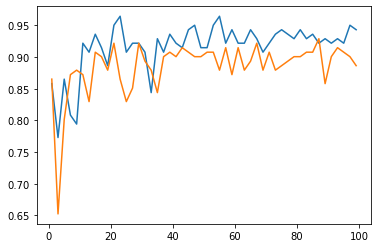

In [34]:
def RFC(x, y, k, depth):
    model=RandomForestClassifier(n_estimators=k, criterion='entropy', max_depth=depth)
    model.fit(x, y)
    return model



def holdOut(xscaled, yflevel):
    for i in range(3):
        k=0
        if i==0:k=10
        elif i==1:k=50
        else:k=100
        print('hold out testing:tree#=', k)
        X_train, X_test, y_train, y_test = train_test_split(xscaled, yflevel, test_size=0.30)
        model=RFC(X_train, y_train, k, 6)
        predicted=model.predict(X_test)
        report=metrics.classification_report(y_test, predicted, output_dict=True)
        confusion=metrics.confusion_matrix(y_test, predicted)
        showResult(report, confusion)

    #compare the accuracy
    #number of trees
    accuracy=[]
    for k in range(1, 100, 2):
        model=RFC(X_train, y_train, k, 6)
        predicted=model.predict(X_test)
        report=metrics.classification_report(y_test, predicted, output_dict=True)
        accuracy.append(report['accuracy'])
    k_range=range(1, 100, 2)
    plt.plot(k_range, accuracy)
   # plt.savefig('RFCompare.png')
        


def kFold(xscaled, yflevel):
    data_kfold = KFold(n_splits=3, random_state=100, shuffle=True)

    for train_index , test_index in data_kfold.split(xscaled):
        X_train, X_test = xscaled[train_index], xscaled[test_index]
        y_train, y_test = yflevel[train_index], yflevel[test_index]
        #print(len(X_test),len(y_test))
        model_rf_k = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
        y_predict = model_rf_k.predict(X_test)
    print('k-fold', classification_report(y_test, y_predict))
    print(confusion_matrix(y_test, y_predict))
        

def showResult(ans_report, ans_matrix):
    
    print('\n-accuracy:', round(ans_report['accuracy'], 2))
    
    print('\n-report:')
    print(f"{'':<8}{'precision':<15}{'recall':<15}")
    for i in ans_report:
        if i=='accuracy':break
        print(f"{i:<8}{round(ans_report[i]['precision'], 2):<15}{round(ans_report[i]['recall'], 2):<15}")
    
    print('\n-confusion matrix:')
    print(ans_matrix)
    
    print("\n")

    
    
def main():     
    ##Binary test
    print('Binary Dataset:\n')
    holdOut(xscaled, yflevel)
    kFold(xscaled, yflevel)
    
    ##5-level test
    print('5-Level Dataset:\n')
    holdOut(xscaled, yflevel)
    kFold(xscaled, yflevel)    
    
if __name__ == "__main__":
    main()
    


### 5. Logistic Regression
#### multi_class參數選用'multinomial',多對多形式來處理多分類問題。參數Ｃ用1,0.5和0.25比較

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',C=1)
x_train, x_test, y_train, y_test = train_test_split(xscaled, yflevel,test_size=0.3)

from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()

x_train_nor=sc.fit_transform(x_train)
x_test_nor=sc.transform(x_test)
model.fit(x_train_nor,y_train)

LogisticRegression(C=1, multi_class='multinomial')

model C=1:  

The score(accuracy) of the model: 0.8439716312056738

confusion matrix of the model:


    0   1   2   3  4
0  15   4   0   0  1
1   3  45   0   0  0
2   0   2  42   0  0
3   0   0   9  12  2
4   0   0   0   1  5

 The mean absolute error is: 0.1773049645390071 

The report the model:

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.88      0.94      0.91        48
           2       0.82      0.95      0.88        44
           3       0.92      0.52      0.67        23
           4       0.62      0.83      0.71         6

    accuracy                           0.84       141
   macro avg       0.82      0.80      0.79       141
weighted avg       0.85      0.84      0.84       141

----------------------------------------------------------------------------------------------------
model C=0.5:  

The score(accuracy) of the model: 0.7872340425531915 

confusion matrix of the model: 

    0

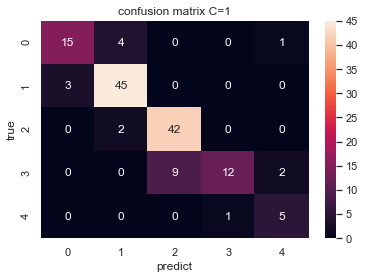

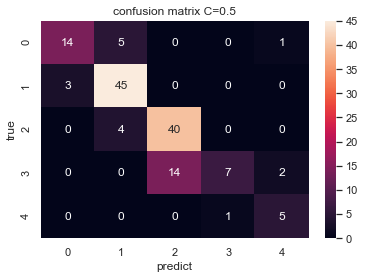

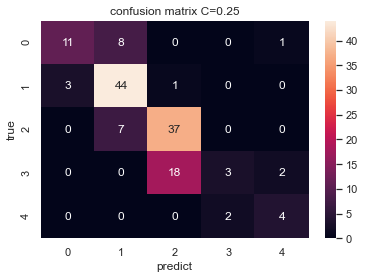

In [36]:
y_true = y_test
y_pred = model.predict(x_test_nor)
print('model C=1: ','\n')
print('The score(accuracy) of the model:',model.score(x_test_nor,y_test))
print('')
from sklearn.metrics import confusion_matrix
con_matrix=pd.DataFrame(confusion_matrix(y_true,y_pred))
print('confusion matrix of the model:')
print('\n')
print(con_matrix)
sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
sns.heatmap(C2,annot=True,ax=ax) 
ax.set_title('confusion matrix C=1') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 
error_logistic = mean_absolute_error(y_test, y_pred)
print('\n','The mean absolute error is:',error_logistic,'\n')
print('The report the model:')
print('')
print(classification_report(y_test, y_pred))
print('-'*100)

model=LogisticRegression(multi_class='multinomial',C=0.5)
model.fit(x_train_nor,y_train)
y_true = y_test
y_pred = model.predict(x_test_nor)
print('model C=0.5: ','\n')
print('The score(accuracy) of the model:',model.score(x_test_nor,y_test),'\n')
from sklearn.metrics import confusion_matrix
con_matrix=pd.DataFrame(confusion_matrix(y_true,y_pred))
print('confusion matrix of the model:','\n')
print(con_matrix)
sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
sns.heatmap(C2,annot=True,ax=ax) 
ax.set_title('confusion matrix C=0.5') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 
error_logistic = mean_absolute_error(y_test, y_pred)
print('\n','The mean absolute error is:',error_logistic,'\n')
print('The report the model:')
print('')
print(classification_report(y_test, y_pred))
print('-'*100)

model=LogisticRegression(multi_class='multinomial',C=0.25)
model.fit(x_train_nor,y_train)
y_true = y_test
y_pred = model.predict(x_test_nor)
print('model C=0.25:')
print('\n')
print('The score(accuracy) of the model:',model.score(x_test_nor,y_test),'\n')
from sklearn.metrics import confusion_matrix
con_matrix=pd.DataFrame(confusion_matrix(y_true,y_pred))
print('confusion matrix of the model:')
print('\n')
print(con_matrix)
sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
sns.heatmap(C2,annot=True,ax=ax) 
ax.set_title('confusion matrix C=0.25') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 
error_logistic = mean_absolute_error(y_test, y_pred)
print('\n','The mean absolute error is:',error_logistic,'\n')
print('The report the model:')
print('')
print(classification_report(y_test, y_pred))
print('-'*100)

